# Setup and Import

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = (
        "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
)

In [102]:
def create_save_visualization(df, column_name, save_filename=None, show=False):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(8, 6), dpi=100)
    sns.histplot(df[column_name], kde=True, color="skyblue", bins=30)
    plt.title(f"{column_name} Distribution", fontsize=16)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    if save_filename:
        plt.savefig(save_filename, bbox_inches="tight")
    if show:
        plt.show()


def read_dataset(file_path):
    df = None
    if file_path.endswith(".csv"):
        df = pd.read_csv(file_path)
    elif file_path.endswith(".xlsx"):
        df = pd.read_excel(file_path)
    return df

def generate_summary_statistics(df):
    summary_stats = df.describe()
    mean_values = df.mean(numeric_only=True)
    median_values = df.median(numeric_only=True)
    std_dev = df.std(numeric_only=True)
    # print(mean_values)
    return summary_stats, mean_values, median_values, std_dev

# Data Lodading and Summary Generated

In [103]:
df = read_dataset(file_path)
assert type(df) is pd.DataFrame

In [104]:
summary, mean_values, median_values, std_dev = generate_summary_statistics(df)
print(summary)

         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                   0.000000   31.13750  
max              

In [105]:
for column in summary.columns:
    #print(summary.loc["mean",column],mean_values[column])
    assert summary.loc["mean",column] - mean_values[column] < 10**(-5)
    assert summary.loc["std",column] - std_dev[column] < 10**(-5)

# Visualization

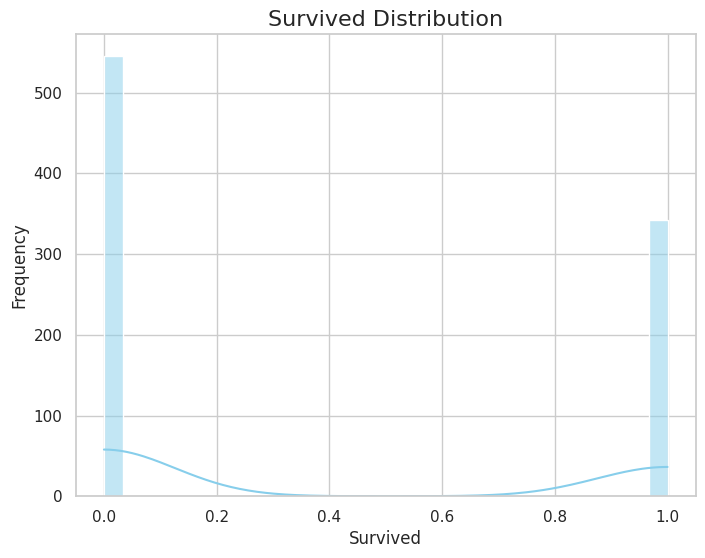

In [106]:
lst= summary.columns
create_save_visualization(df,lst[0],show=True)

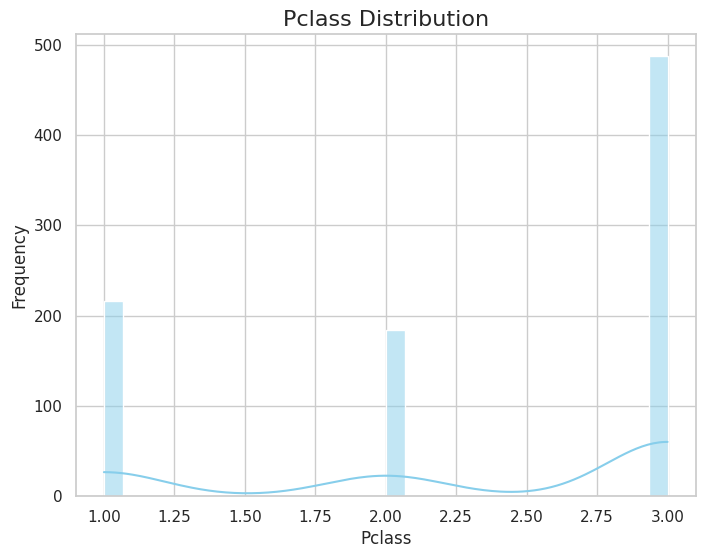

In [107]:
create_save_visualization(df,lst[1],show=True)

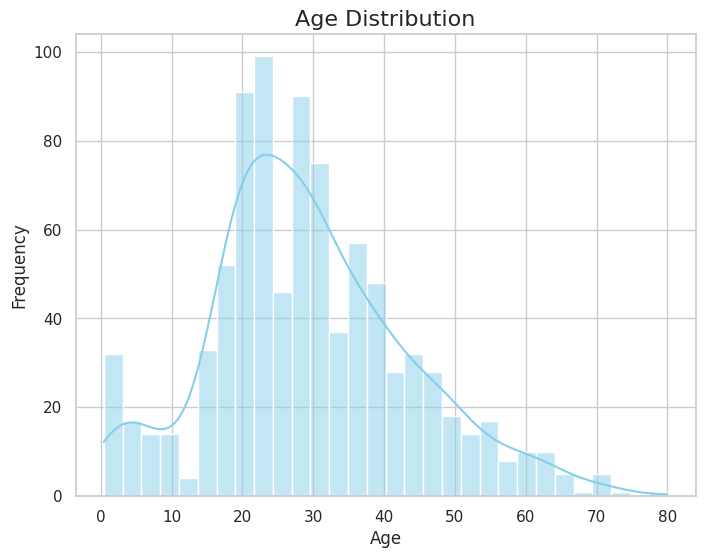

In [108]:
create_save_visualization(df,lst[2],show=True)

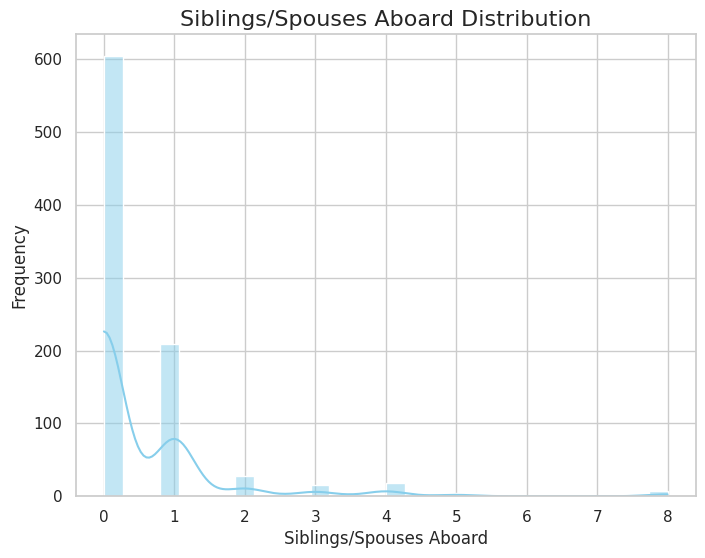

In [109]:
create_save_visualization(df,lst[3],show=True)

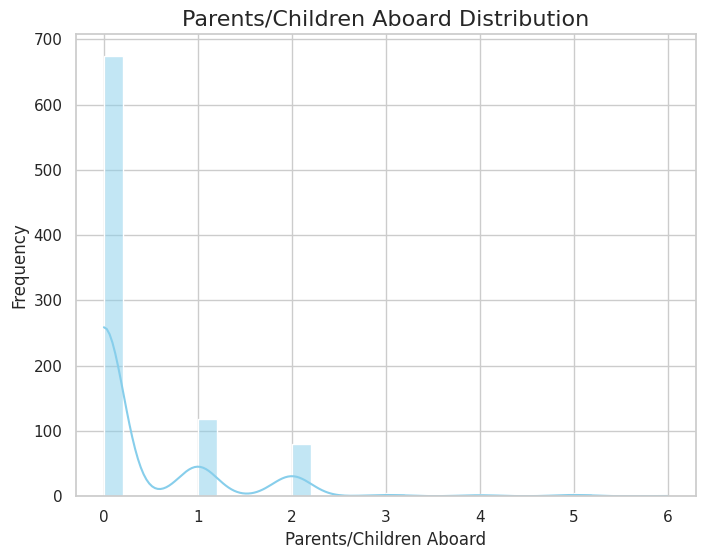

In [110]:
create_save_visualization(df,lst[4],show=True)

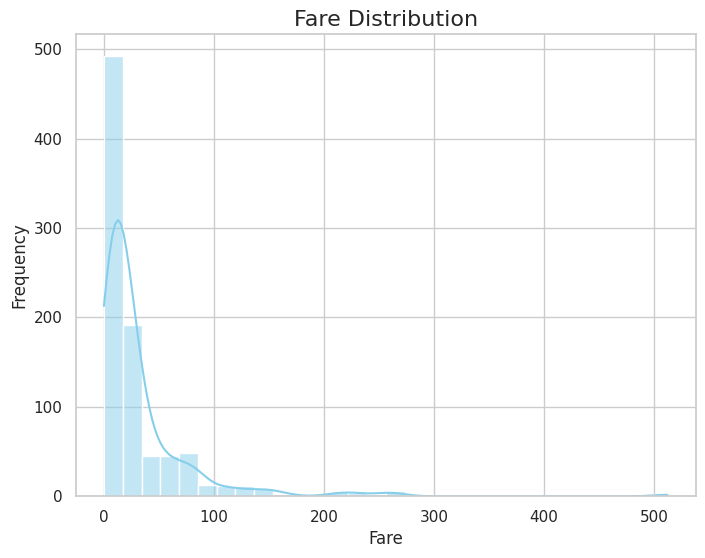

In [111]:
create_save_visualization(df,lst[5],show=True)

# Data Preprocessing (Data Manipulation)

In [112]:
# Create a new column 'FamilySize' as the sum of 'Siblings/Spouses Aboard' and 'Parents/Children Aboard' plus 1 (for the individual)
df['FamilySize'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard'] + 1


In [113]:
# Define age bins and categorize passengers into age groups
age_bins = [0, 12, 18, 35, 60, 120]
age_labels = ['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

In [114]:
# Encode 'Sex' column as numerical values (Male: 0, Female: 1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# New Statistics

In [115]:
# Display the first few rows of the transformed dataset
print(df.head())

   Survived  Pclass                                               Name  Sex  \
0         0       3                             Mr. Owen Harris Braund    0   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...    1   
2         1       3                              Miss. Laina Heikkinen    1   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle    1   
4         0       3                            Mr. William Henry Allen    0   

    Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  \
0  22.0                        1                        0   7.2500   
1  38.0                        1                        0  71.2833   
2  26.0                        0                        0   7.9250   
3  35.0                        1                        0  53.1000   
4  35.0                        0                        0   8.0500   

   FamilySize    AgeGroup  
0           2       Adult  
1           2  Middle Age  
2           1       

In [116]:
# Calculate the average fare for each passenger class
average_fare_by_class = df.groupby('Pclass')['Fare'].mean()
print(average_fare_by_class)

Pclass
1    84.154687
2    20.662183
3    13.707707
Name: Fare, dtype: float64


In [117]:
# Calculate survival rate by gender and passenger class
survival_rate = df.groupby(['Pclass', 'Sex'])['Survived'].mean()
print(survival_rate)

Pclass  Sex
1       0      0.368852
        1      0.968085
2       0      0.157407
        1      0.921053
3       0      0.137026
        1      0.500000
Name: Survived, dtype: float64


In [118]:
# Create a pivot table for survival rate by age group and passenger class
survival_pivot = df.pivot_table(values='Survived', index='AgeGroup', columns='Pclass', aggfunc='mean', observed=True)
print(survival_pivot)

Pclass             1         2         3
AgeGroup                                
Child       0.750000  1.000000  0.396552
Teenager    0.916667  0.500000  0.285714
Adult       0.732394  0.435644  0.247387
Middle Age  0.587719  0.372549  0.084507
Senior      0.200000  0.333333  0.125000


In [119]:
# Get summary statistics for numerical columns
statistics_summary = df.describe()
print(statistics_summary)

         Survived      Pclass         Sex         Age  \
count  887.000000  887.000000  887.000000  887.000000   
mean     0.385569    2.305524    0.354002   29.471443   
std      0.487004    0.836662    0.478480   14.121908   
min      0.000000    1.000000    0.000000    0.420000   
25%      0.000000    2.000000    0.000000   20.250000   
50%      0.000000    3.000000    0.000000   28.000000   
75%      1.000000    3.000000    1.000000   38.000000   
max      1.000000    3.000000    1.000000   80.000000   

       Siblings/Spouses Aboard  Parents/Children Aboard       Fare  FamilySize  
count               887.000000               887.000000  887.00000  887.000000  
mean                  0.525366                 0.383315   32.30542    1.908681  
std                   1.104669                 0.807466   49.78204    1.615949  
min                   0.000000                 0.000000    0.00000    1.000000  
25%                   0.000000                 0.000000    7.92500    1.000000  


# New Visualization

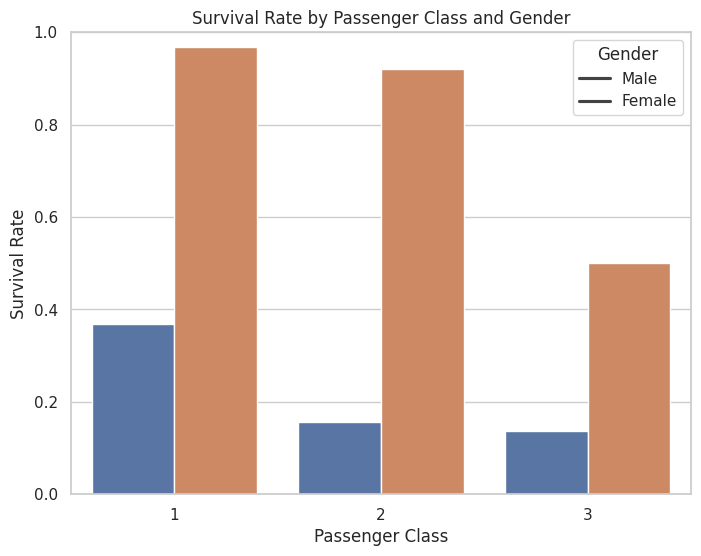

In [120]:
sns.set(style="whitegrid")

# Calculate survival rate by passenger class and gender
survival_rate = df.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=survival_rate, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival Rate by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()


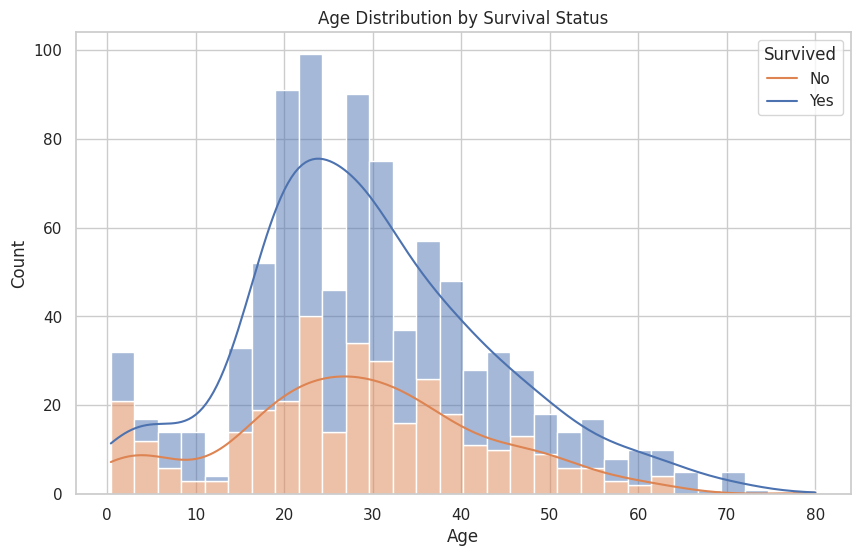

In [121]:
# Plot Age distribution by Survival status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=True, bins=30)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()
